In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, metrics, model_selection, svm
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b>Success:</b> Very good that all imports are collected in the first cell of the notebook!
</div>

**Download and prepare the data. Explain the procedure.**

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Remove the not needed column, and also remove the surname column and CustomerId column. I dont think the surname of a user will have any effect

In [5]:
df.drop(['RowNumber','Surname','CustomerId'],axis=1,inplace=True)

The null values in the Tenure column are only 10% of the whole data, so I will drop them.

In [6]:
df.dropna(inplace=True)

lets make the dummy categories

In [7]:
df=pd.get_dummies(df,['Geography','Gender'],drop_first=True);

Now lets divide the whole data into training, test and validation sets.

In [8]:
target = df['Exited']
features = df.drop('Exited', axis=1)

In [9]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features,target, test_size=0.4, random_state=12345)
features_valid, features_test,target_valid,target_test = train_test_split(features_valid_test,target_valid_test, test_size=0.5, random_state=12345)

In [10]:
print(features_train.shape)
print(features_test.shape)
print(features_valid.shape)

(5454, 11)
(1819, 11)
(1818, 11)


Now lets perform standartizing

In [11]:
scaler = StandardScaler()

In [12]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary','NumOfProducts']
scaler.fit(features_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

**Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.**

In [14]:
df['Exited'].mean()

0.2039379606203938

class balance is far from 1:1 which means that classes are imbalanced, now lets train the model with imbalanced classes.

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
for i in range(2,10):
    model = DecisionTreeClassifier(random_state=12345,max_depth = i,class_weight='balanced')
    model.fit(features_train,target_train)
    predicted_valid = model.predict(features_valid)
    print("max_depth =", i, ": ", end='')
    print(f1_score(target_valid, predicted_valid))

max_depth = 2 : 0.5297619047619048
max_depth = 3 : 0.548936170212766
max_depth = 4 : 0.5461187214611872
max_depth = 5 : 0.5735449735449736
max_depth = 6 : 0.5630885122410546
max_depth = 7 : 0.5413533834586466
max_depth = 8 : 0.5581896551724138
max_depth = 9 : 0.5115257958287596


In [17]:
for i in range(2,10):
    model = DecisionTreeClassifier(random_state=12345,max_depth = i)
    model.fit(features_train,target_train)
    predicted_valid = model.predict(features_valid)
    print("max_depth =", i, ": ", end='')
    print(f1_score(target_valid, predicted_valid))

max_depth = 2 : 0.5304878048780488
max_depth = 3 : 0.3726708074534161
max_depth = 4 : 0.5414551607445008
max_depth = 5 : 0.5140712945590994
max_depth = 6 : 0.5606837606837607
max_depth = 7 : 0.5764331210191083
max_depth = 8 : 0.5413290113452188
max_depth = 9 : 0.5446153846153846


We could not achieve good enough score.

Lets try LogisticRegression

In [18]:
model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.509731232622799


Logistic regression did not give us good enough results eather

**Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.**

lets try upsampling first

In [19]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [20]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.mean()

0.509963768115942

In [21]:
model = LogisticRegression(solver='liblinear',random_state = 12345,class_weight='balanced')
model.fit(features_upsampled,target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.509731232622799


Lets try Decision tree

In [22]:
for i in range(2,10):
    model = DecisionTreeClassifier(random_state=12345,max_depth = i)
    model.fit(features_upsampled,target_upsampled)
    predicted_valid = model.predict(features_valid)
    print("max_depth =", i, ": ", end='')
    print(f1_score(target_valid, predicted_valid))

max_depth = 2 : 0.5297619047619048
max_depth = 3 : 0.548936170212766
max_depth = 4 : 0.5461187214611872
max_depth = 5 : 0.5735449735449736
max_depth = 6 : 0.5630885122410546
max_depth = 7 : 0.5413533834586466
max_depth = 8 : 0.5581395348837209
max_depth = 9 : 0.5159165751920965


In [23]:
for i in range(2,10):
    model = DecisionTreeClassifier(random_state=12345,max_depth = i,class_weight='balanced')
    model.fit(features_upsampled,target_upsampled)
    predicted_valid = model.predict(features_valid)
    print("max_depth =", i, ": ", end='')
    print(f1_score(target_valid, predicted_valid))

max_depth = 2 : 0.5297619047619048
max_depth = 3 : 0.548936170212766
max_depth = 4 : 0.5461187214611872
max_depth = 5 : 0.5735449735449736
max_depth = 6 : 0.5630885122410546
max_depth = 7 : 0.5409990574929311
max_depth = 8 : 0.5599999999999999
max_depth = 9 : 0.5137816979051819


let's try  RandomForestClassifier

In [24]:
for i in range(10,101,10):
    model = RandomForestClassifier(random_state=12345,n_estimators = i,max_depth=10,class_weight='balanced')
    model.fit(features_upsampled,target_upsampled)
    predictions_valid = model.predict(features_valid)
    print("n_estimators =", i, ": ", end='')
    print(f1_score(target_valid, predictions_valid))

n_estimators = 10 : 0.6033254156769595
n_estimators = 20 : 0.6045949214026602
n_estimators = 30 : 0.6222760290556901
n_estimators = 40 : 0.6304347826086956
n_estimators = 50 : 0.6227544910179641
n_estimators = 60 : 0.6298076923076922
n_estimators = 70 : 0.6336154776299879
n_estimators = 80 : 0.6311970979443773
n_estimators = 90 : 0.625
n_estimators = 100 : 0.6284348864994026


In [25]:
for i in range(10,101,10):
    model = RandomForestClassifier(random_state=12345,n_estimators = i,max_depth=10)
    model.fit(features_upsampled,target_upsampled)
    predictions_valid = model.predict(features_valid)
    print("n_estimators =", i, ": ", end='')
    print(f1_score(target_valid, predictions_valid))

n_estimators = 10 : 0.5976190476190476
n_estimators = 20 : 0.6052009456264776
n_estimators = 30 : 0.6161137440758293
n_estimators = 40 : 0.6206896551724138
n_estimators = 50 : 0.6232227488151659
n_estimators = 60 : 0.6267942583732058
n_estimators = 70 : 0.6236559139784947
n_estimators = 80 : 0.6248520710059172
n_estimators = 90 : 0.6247030878859857
n_estimators = 100 : 0.6239620403321471


Now lets try downsampling

In [26]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [27]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)
target_downsampled.mean()

0.5002221235006664

In [28]:
model = LogisticRegression(random_state = 12345,solver='liblinear',class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5027422303473491


lets try decision tree

In [29]:
for i in range(2,10):
    model = DecisionTreeClassifier(random_state=12345,max_depth = i)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    print("max_depth =", i, ": ", end='')
    print(f1_score(target_valid, predicted_valid))

max_depth = 2 : 0.5100788781770377
max_depth = 3 : 0.5100788781770377
max_depth = 4 : 0.5563173359451519
max_depth = 5 : 0.5609532538955087
max_depth = 6 : 0.5652582159624413
max_depth = 7 : 0.574642126789366
max_depth = 8 : 0.570273003033367
max_depth = 9 : 0.5285451197053407


In [30]:
for i in range(2,10):
    model = DecisionTreeClassifier(random_state=12345,max_depth = i,class_weight='balanced')
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    print("max_depth =", i, ": ", end='')
    print(f1_score(target_valid, predicted_valid))

max_depth = 2 : 0.5100788781770377
max_depth = 3 : 0.5100788781770377
max_depth = 4 : 0.5563173359451519
max_depth = 5 : 0.5609532538955087
max_depth = 6 : 0.5652582159624413
max_depth = 7 : 0.5743589743589744
max_depth = 8 : 0.570273003033367
max_depth = 9 : 0.5275735294117647


let's try  RandomForestClassifier

In [31]:
for i in range(10,101,10):
    model = RandomForestClassifier(random_state=12345,n_estimators = i,max_depth=10)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    print("n_estimators =", i, ": ", end='')
    print(f1_score(target_valid, predictions_valid))

n_estimators = 10 : 0.5620655412115194
n_estimators = 20 : 0.5813008130081301
n_estimators = 30 : 0.5868263473053892
n_estimators = 40 : 0.5869346733668342
n_estimators = 50 : 0.584493041749503
n_estimators = 60 : 0.5877632898696088
n_estimators = 70 : 0.5864811133200796
n_estimators = 80 : 0.5903614457831325
n_estimators = 90 : 0.5904954499494439
n_estimators = 100 : 0.5851703406813626


In [32]:
for i in range(10,101,10):
    model = RandomForestClassifier(random_state=12345,n_estimators = i,max_depth=10,class_weight='balanced')
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    print("n_estimators =", i, ": ", end='')
    print(f1_score(target_valid, predictions_valid))

n_estimators = 10 : 0.5650857719475277
n_estimators = 20 : 0.5916666666666667
n_estimators = 30 : 0.597938144329897
n_estimators = 40 : 0.5969230769230769
n_estimators = 50 : 0.5891783567134269
n_estimators = 60 : 0.5905905905905906
n_estimators = 70 : 0.5892857142857142
n_estimators = 80 : 0.5869565217391305
n_estimators = 90 : 0.590818363273453
n_estimators = 100 : 0.593186372745491


**Perform the final testing.**

After all I got the best result on validation set with upsampled, max_depth=10,n_estimators=70,class_weight='balanced'  RandomForestClassifier F1 score is 0.6336154776299879, lets do the final testing.

In [35]:
model = RandomForestClassifier(random_state=12345,max_depth = 10,n_estimators=70,class_weight='balanced')
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=70, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False)

In [36]:
predicted_test = model.predict(features_test)
print(f1_score(target_test, predicted_test))

0.5903307888040712


I achieved the minimal required 0.59 f1 score,Now lets look at the roc auc curve

In [39]:
tf = pd.DataFrame({'y_true': target_test, 'y_pred': model.predict(features_test)})

In [40]:
tf['y_prob'] = model.predict_proba(features_test)[:,1]

In [41]:
thrs = tf['y_prob'].unique()

In [42]:
thrs.sort()
thrs = list(thrs)

In [43]:
thrs = [0] + thrs + [1]

In [44]:
res = []
for thr in tqdm(thrs):
  t = tf[['y_true','y_prob']].copy()
  t['y_pred'] = (t['y_prob'] > thr) * 1
  tpr = t[t['y_true'] == 1]['y_pred'].mean()
  fpr = t[t['y_true'] == 0]['y_pred'].mean()
  res.append([tpr,fpr,thr])

In [45]:
roc = pd.DataFrame(res)

In [46]:
roc.columns = ['tpr','fpr','thr']

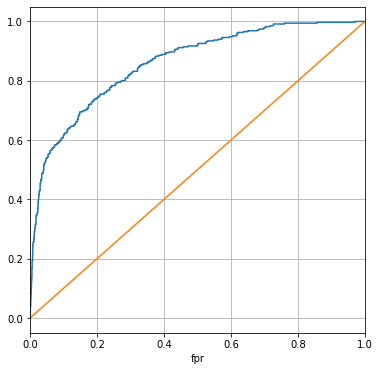

In [47]:
p = roc.set_index('fpr')['tpr'].plot(grid=True, figsize=(6,6))
p.plot([0,1])

After all i can conclude that I tried many different techniques and achieved the goal of F1 score then I made and analized the ROC curve and I can conclude that my model is better then guessing.